# **Importing Required Libraries:**

In [27]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Data Loading:**

In [2]:
data = pd.read_csv("reviews.csv", dtype=str) 
data.columns = ['rating','review']
print(data.head())
count_with_non = data[data. columns[0]]. count()
print(count_with_non)
data.dropna(inplace = True)
count_without_non = data[data. columns[0]]. count()
print(count_without_non)
print("There is no none values in the data")

  rating                                             review
0      1  This product so far has not disappointed. My c...
1      1  great for beginner or experienced person. Boug...
2      1  Inexpensive tablet for him to use and learn on...
3      1  I've had my Fire HD 8 two weeks now and I love...
4      1  I bought this for my grand daughter when she c...
34659
34659
There is no none values in the data


In [3]:
reviews = data.review
ratings = data.rating

# **Data Preprocessing:**

In [15]:
def text_preprocessing(text):
  stop_words = set(stopwords.words('english')) 
  stemmer = PorterStemmer(PorterStemmer.ORIGINAL_ALGORITHM)
  
  tokens = word_tokenize(text)
  splitted_words_without_stops = [word for word in tokens if not word in stop_words]
  splitted_words_without_puncs = [word for word in splitted_words_without_stops  if word.isalnum()] 
  stemmed_words = [stemmer.stem(word) for word in splitted_words_without_puncs]

  return ' '.join(stemmed_words)


# **Data splitting:**

In [16]:
X = reviews
Y = ratings
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42)
print(len(X_test))
print(type(X_test))

10398
<class 'pandas.core.series.Series'>


# **Bag of Words Feature extractor:**

In [18]:
feature_extractor = CountVectorizer(lowercase=False, preprocessor=text_preprocessing)

# **Naive Bayes Training:**

In [19]:
pipe_NB = Pipeline([
    ('feature_extractor', feature_extractor),
    ('Naive_bayes', MultinomialNB())
])

pipe_NB.fit(X_train, y_train)
NB_predicted_training = pipe_NB.predict(X_train)

NB_training_acc = (metrics.accuracy_score(y_train, NB_predicted_training))*100
print('The training accuracy:',NB_training_acc,'% accuracy')

The training accuracy: 98.02151601335477 % accuracy


# **Naive Bayes Testing:**

In [21]:
NB_predicted_testing = pipe_NB.predict(X_test)

NB_testing_acc = (metrics.accuracy_score(y_test, NB_predicted_testing))*100
print('The test accuracy:',NB_testing_acc,'% accuracy')

The test accuracy: 97.49951913829584 % accuracy


# **Results' visulaization:**

In [25]:
print(classification_report(y_test, NB_predicted_testing))

              precision    recall  f1-score   support

           0       0.44      0.18      0.25       248
           1       0.98      0.99      0.99     10150

    accuracy                           0.97     10398
   macro avg       0.71      0.59      0.62     10398
weighted avg       0.97      0.97      0.97     10398



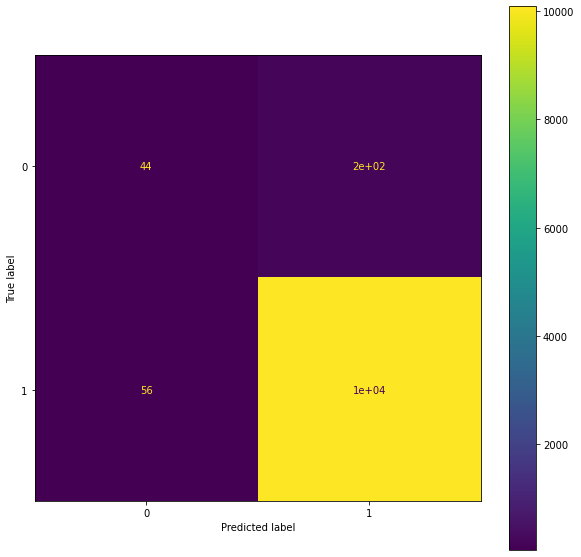

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pipe_NB, X_test, y_test, ax=ax)  
plt.show()